# Project 1 - Major League Baseball Analysis

In [1]:
#PROJECT SCOPE:

#Question 1 - How does the spending of each champion compare to the rest of the league?
#Objective 1 - Collect the salary spent for the world series champions by year
#Objective 2 - Collect the average salary spent for the losers by year
#Objective 3 - Summary DF and Graph comparing objective 1 and objective 2

#---------------------------------------------------------------------------------

#Question 2 - What are the guiding parameters for salary spent for winning teams?
#Objective 1 - Find the mean and STD for the salaries per year for the entire league
#Objective 2 - Calculate the number of STD's the winning salary deviates from the mean by year
#Objective 3 - Summary DF and Graph Objective 2

#----------------------------------------------------------------------------------

#Question 3 - Do the teams that spend the most, win the most?
#Objective 1 - Find the top 5 teams in salary spent per year
#Objective 2 - Find out how many times teams with a top 5 salary spent won the championship by year
#Objective 3 - Calculate the percentage of times a top 5 salary spent team won the championship

#----------------------------------------------------------------------------------

#Question 4 - Are there any commonalities between championship teams?
#Objective 1 - Summary DF of all World Series Champions statistics
#Objective 2 - Statisical Analysis on that Dataframe (mean of statistical categories)
#Objective 3 - Develop a statistical profile for a typical world series champion

In [2]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
#CSV Read Ins from Kaggle Website

#Teams File - Convert to DataFrame
teams_filepath = "Resources/Teams.csv"
teams_df = pd.read_csv(teams_filepath)

#Salary File - COnvert to DataFrame
salary_csvpath = "Resources/Salaries.csv"
salary_df = pd.read_csv(salary_csvpath)

In [10]:
#Dataframe Cleanup - Preparing Dataframes to Analyze

#Teams CSV - Organize Columns, Drop Years Prior to 1985
teams_df = teams_df[["name", "teamID", "yearID", "WSWin", "G", "W", "L", "R", "AB", "H", "2B", "3B", "HR", "BB", "SO", "SB", "ER", "ERA", "CG", "E"]]
teams_df = teams_df.loc[teams_df["yearID"] > 1984]

#Salary CSV - Group Salary Dataframe by YearID & TeamID, retrieve sum
salary_year = salary_df.groupby(by=['yearID','teamID'])['salary'].sum()
salary_df = pd.DataFrame(salary_year)

In [11]:
#Get Stats Data for the Winners & Losers of the World Series
ws_winners_df = pd.DataFrame(teams_df.loc[(teams_df["WSWin"] == "Y")])
ws_losers_df = pd.DataFrame(teams_df.loc[(teams_df["WSWin"] == "N")])

In [6]:
#Merge Dataframes to get Stats Data and Salary Data in one dataframe
combined_allteams_df = pd.merge(teams_df, salary_df, on=["yearID", "teamID"])
combined_wswinners_df = pd.merge(ws_winners_df, salary_df, on=["yearID", "teamID"])
combined_wslosers_df = pd.merge(ws_losers_df, salary_df, on=["yearID", "teamID"])

In [7]:
#See Combined Dataframe
combined_allteams_df.head()

,name,teamID,yearID,WSWin,G,W,L,R,AB,H,...,3B,HR,BB,SO,SB,ER,ERA,CG,E,salary
0,Atlanta Braves,ATL,1985,N,162,66,96,632,5526,1359,...,28,126,553,849.0,72.0,678,4.19,9,159,14807000
1,Baltimore Orioles,BAL,1985,N,161,83,78,818,5517,1451,...,22,214,604,908.0,69.0,694,4.38,32,115,11560712
2,Boston Red Sox,BOS,1985,N,163,81,81,800,5720,1615,...,31,162,562,816.0,66.0,659,4.06,35,145,10897560
3,California Angels,CAL,1985,N,162,90,72,732,5442,1364,...,31,153,648,902.0,106.0,633,3.91,22,112,14427894
4,Chicago White Sox,CHA,1985,N,163,85,77,736,5470,1386,...,37,146,471,843.0,108.0,656,4.07,20,111,9846178


In [8]:
#See World Series Winners Dataframe
combined_wswinners_df.head()

,name,teamID,yearID,WSWin,G,W,L,R,AB,H,...,3B,HR,BB,SO,SB,ER,ERA,CG,E,salary
0,Kansas City Royals,KCA,1985,Y,162,91,71,687,5500,1384,...,49,154,473,840.0,128.0,567,3.49,27,127,9321179
1,New York Mets,NYN,1986,Y,162,108,54,783,5558,1462,...,31,148,631,968.0,118.0,513,3.11,27,138,15393714
2,Minnesota Twins,MIN,1987,Y,162,85,77,786,5441,1422,...,35,196,523,898.0,113.0,734,4.63,16,98,6397500
3,Los Angeles Dodgers,LAN,1988,Y,162,94,67,628,5431,1346,...,25,99,437,947.0,131.0,481,2.96,32,142,16850515
4,Oakland Athletics,OAK,1989,Y,162,99,63,712,5416,1414,...,25,127,562,855.0,157.0,497,3.09,17,129,15613070


In [9]:
#See World Series Losers Dataframe
combined_wslosers_df.head()

,name,teamID,yearID,WSWin,G,W,L,R,AB,H,...,3B,HR,BB,SO,SB,ER,ERA,CG,E,salary
0,Atlanta Braves,ATL,1985,N,162,66,96,632,5526,1359,...,28,126,553,849.0,72.0,678,4.19,9,159,14807000
1,Baltimore Orioles,BAL,1985,N,161,83,78,818,5517,1451,...,22,214,604,908.0,69.0,694,4.38,32,115,11560712
2,Boston Red Sox,BOS,1985,N,163,81,81,800,5720,1615,...,31,162,562,816.0,66.0,659,4.06,35,145,10897560
3,California Angels,CAL,1985,N,162,90,72,732,5442,1364,...,31,153,648,902.0,106.0,633,3.91,22,112,14427894
4,Chicago White Sox,CHA,1985,N,163,85,77,736,5470,1386,...,37,146,471,843.0,108.0,656,4.07,20,111,9846178


## Andrey's working on Question 1 - How does the spending of each champion compare to the rest of the league?

##### Objective 1 - Collect the salary spent for the world series champions by year

<BarContainer object of 30 artists>

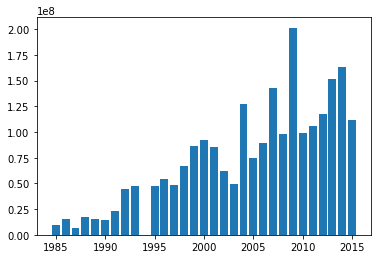

In [21]:
plt.bar(combined_wswinners_df['yearID'],combined_wswinners_df['salary'])

##### Objective 2 - Collect the average salary spent for the losers by year

In [67]:
losers_salary_df = combined_wslosers_df.groupby(['yearID'])[['salary']].mean().reset_index()
losers_salary_df.head(1)

,yearID,salary
0,1985,10105740.68


<BarContainer object of 30 artists>

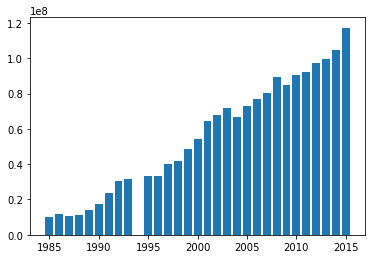

In [30]:
plt.bar(losers_salary_df['yearID'], losers_salary_df['salary'])

###### Objective 3 - Summary DF and Graph comparing objective 1 and objective 2

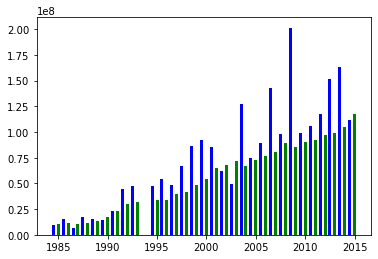

<Figure size 1080x72 with 0 Axes>

In [66]:
ax = plt.subplot()
ax.bar(combined_wswinners_df['yearID']-0.5, combined_wswinners_df['salary'], width=0.3, color='b', align='center')
ax.bar(losers_salary_df['yearID'], losers_salary_df['salary'], width=0.3, color='g', align='center')
plt.figure(figsize=(15, 1))
# ax.autoscale(tight=False)
plt.show()